# CarDekho Price Prediction

#### Problem Statement:
The used car market in India is a dynamic and ever-changing landscape. Prices can fluctuate wildly based on a variety of factors including the make and model of the car, its mileage, its condition and the current market conditions. As a result, it can be difficult for sellers to accurately price their cars.

#### Approach:
We propose to develop a machine learning model that can predict the price of a used car based on its features. The model will be trained on a dataset of used cars that have been sold on Cardekho.com in India. The model will then be able to be used to predict the price of any used car, given its features.

* Dataset Overview
The dataset contains 14 features, including:

* car_name – Name of the car model
* brand – Manufacturer of the car
* vehicle_age – Age of the car (years)
* km_driven – Distance driven by the car (in km)
* seller_type – Individual or Dealer
* fuel_type – Petrol, Diesel, CNG, etc.
* transmission_type – Manual or Automatic
* mileage – Fuel efficiency (km per liter)
* engine – Engine capacity (cc)
* max_power – Maximum power output (bhp)
* seats – Number of seats
* selling_price – Final selling price of the car (target variable)

#### Data Loading & Exploration


Load dataset using pandas, 
Display basic stats using .info() and .describe(), 
Check for missing values

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np


In [9]:
dataset =  pd.read_csv("cardekho.csv")
print(dataset)

       Unnamed: 0         car_name     brand     model  vehicle_age  \
0               0      Maruti Alto    Maruti      Alto            9   
1               1    Hyundai Grand   Hyundai     Grand            5   
2               2      Hyundai i20   Hyundai       i20           11   
3               3      Maruti Alto    Maruti      Alto            9   
4               4    Ford Ecosport      Ford  Ecosport            6   
...           ...              ...       ...       ...          ...   
15406       19537      Hyundai i10   Hyundai       i10            9   
15407       19540    Maruti Ertiga    Maruti    Ertiga            2   
15408       19541      Skoda Rapid     Skoda     Rapid            6   
15409       19542  Mahindra XUV500  Mahindra    XUV500            5   
15410       19543       Honda City     Honda      City            2   

       km_driven seller_type fuel_type transmission_type  mileage  engine  \
0         120000  Individual    Petrol            Manual    19.70     

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         15411 non-null  int64  
 1   car_name           15411 non-null  object 
 2   brand              15411 non-null  object 
 3   model              15411 non-null  object 
 4   vehicle_age        15411 non-null  int64  
 5   km_driven          15411 non-null  int64  
 6   seller_type        15411 non-null  object 
 7   fuel_type          15411 non-null  object 
 8   transmission_type  15411 non-null  object 
 9   mileage            15411 non-null  float64
 10  engine             15411 non-null  int64  
 11  max_power          15411 non-null  float64
 12  seats              15411 non-null  int64  
 13  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 1.6+ MB


In [8]:
dataset.shape

(15411, 14)

In [9]:
dataset.describe()

,Unnamed: 0,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,9811.857699,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,5643.418542,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4906.500000,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,9872.000000,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,14668.500000,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,19543.000000,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [6]:
dataset.isnull().sum()

Unnamed: 0           0
car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [15]:
dataset["car_name"].unique()

array(['Maruti Alto', 'Hyundai Grand', 'Hyundai i20', 'Ford Ecosport',
       'Maruti Wagon R', 'Hyundai i10', 'Hyundai Venue', 'Maruti Swift',
       'Hyundai Verna', 'Renault Duster', 'Mini Cooper', 'Maruti Ciaz',
       'Mercedes-Benz C-Class', 'Toyota Innova', 'Maruti Baleno',
       'Maruti Swift Dzire', 'Volkswagen Vento', 'Hyundai Creta',
       'Honda City', 'Mahindra Bolero', 'Toyota Fortuner', 'Renault KWID',
       'Honda Amaze', 'Hyundai Santro', 'Mahindra XUV500',
       'Mahindra KUV100', 'Maruti Ignis', 'Datsun RediGO',
       'Mahindra Scorpio', 'Mahindra Marazzo', 'Ford Aspire', 'Ford Figo',
       'Maruti Vitara', 'Tata Tiago', 'Volkswagen Polo', 'Kia Seltos',
       'Maruti Celerio', 'Datsun GO', 'BMW 5', 'Honda CR-V',
       'Ford Endeavour', 'Mahindra KUV', 'Honda Jazz', 'BMW 3', 'Audi A4',
       'Tata Tigor', 'Maruti Ertiga', 'Tata Safari', 'Mahindra Thar',
       'Tata Hexa', 'Land Rover Rover', 'Maruti Eeco', 'Audi A6',
       'Mercedes-Benz E-Class', 'Audi Q7'

In [14]:
dataset["car_name"].nunique()

121

In [ ]:
# which car is being sold the most on the platform ?

In [12]:
dataset['car_name'].value_counts(normalize = True)*100

car_name
Hyundai i20              5.878918
Maruti Swift Dzire       5.775096
Maruti Swift             5.067809
Maruti Alto              5.048342
Honda City               4.912076
                           ...   
Mercedes-AMG C           0.006489
Rolls-Royce Ghost        0.006489
Maserati Quattroporte    0.006489
Isuzu MUX                0.006489
Force Gurkha             0.006489
Name: proportion, Length: 121, dtype: float64

## Exploratory Data Analysis (EDA)

## Univariate Analysis (Individual Feature Exploration)

* Visualize mileage, vehicle age, selling price, and km driven using KDE (Kernel Density Estimation) plots.

<Axes: xlabel='mileage', ylabel='Density'>

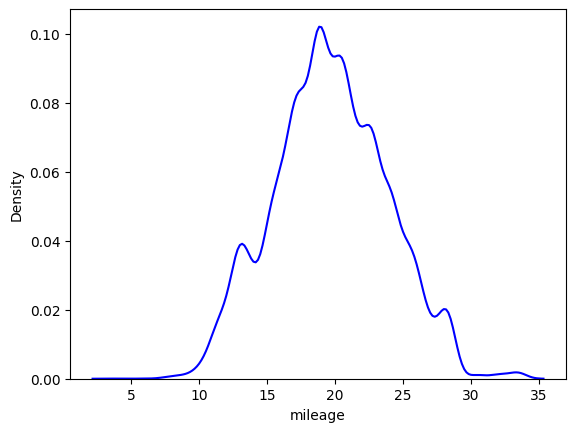

In [20]:
sns.kdeplot( x= dataset["mileage"],color = "b")

<Axes: xlabel='mileage', ylabel='Density'>

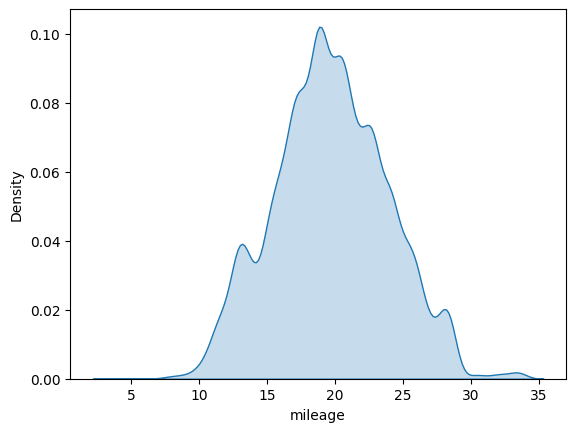

In [10]:
sns.kdeplot( x= dataset["mileage"], fill ="true")

<Axes: xlabel='selling_price', ylabel='Density'>

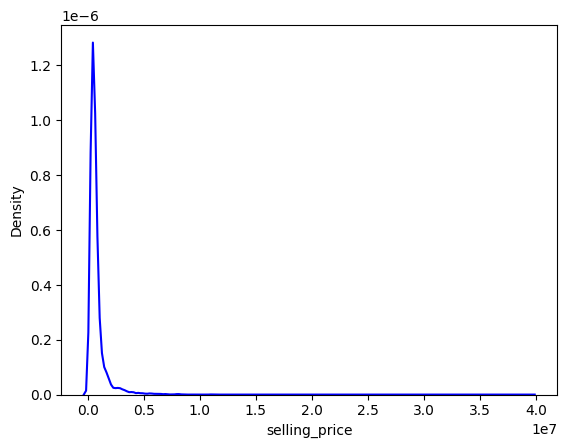

In [24]:
sns.kdeplot( x= dataset["selling_price"],color = "b")

<Axes: xlabel='km_driven', ylabel='Density'>

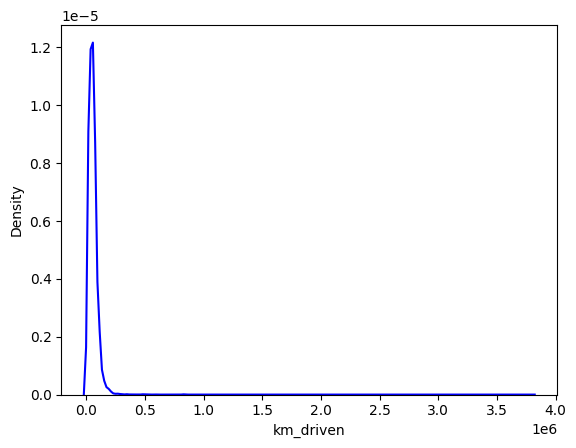

In [25]:
sns.kdeplot( x= dataset["km_driven"],color = "b")

<Axes: xlabel='vehicle_age', ylabel='Density'>

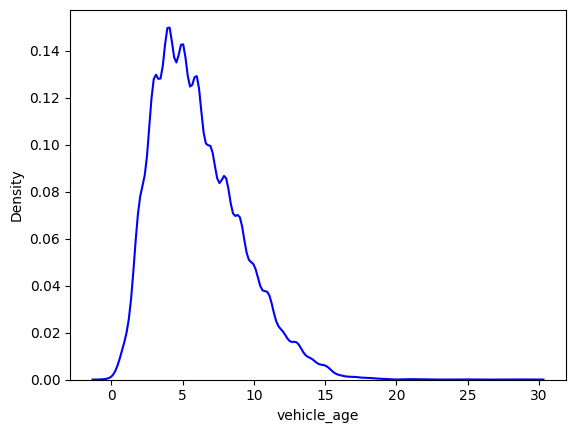

In [13]:
sns.kdeplot( x= dataset["vehicle_age"],color = "b")

Insights

* Most cars have mileage between 15-22 km/l.
* Most cars are between 4-8 years old.
* Selling price varies widely, with most cars priced under ₹10 lakh.

## Bivariate Analysis

#### Scatter plots to visualize relationships between features.

<Axes: xlabel='vehicle_age', ylabel='selling_price'>

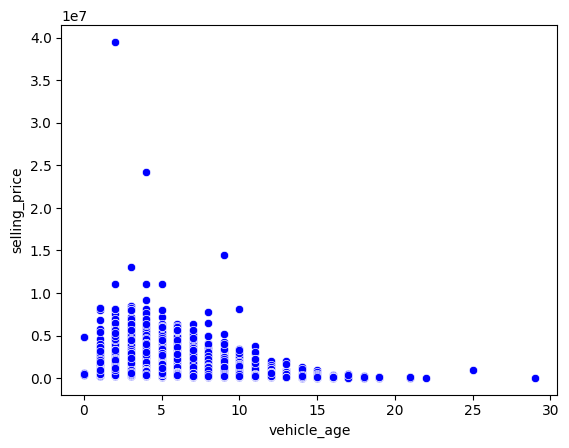

In [15]:
sns.scatterplot(data = dataset, x = "vehicle_age", y = "selling_price",color = "b")

<Axes: xlabel='mileage', ylabel='selling_price'>

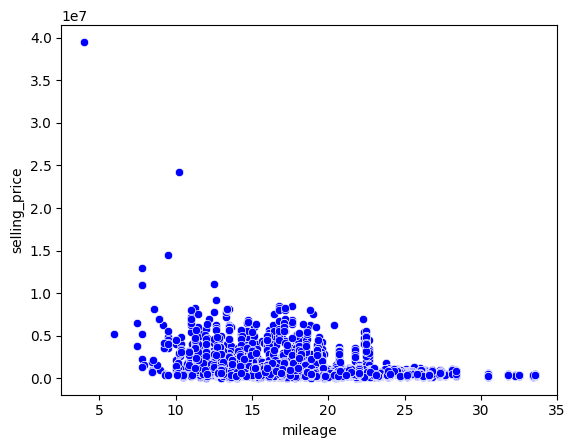

In [17]:
sns.scatterplot(data = dataset, x = "mileage", y = "selling_price",color = "b")

<Axes: xlabel='max_power', ylabel='selling_price'>

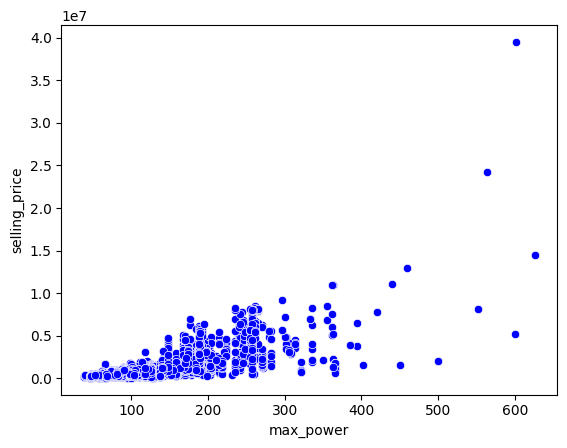

In [18]:
sns.scatterplot(data = dataset, x = "max_power", y = "selling_price",color = "b")

Key Insights from Scatter Plots

* Older cars have lower selling prices (Negative correlation between vehicle_age and selling_price).
* Higher mileage does not always mean a higher price – premium brands may have lower mileage but still command higher prices.
* Cars with more power (max_power) tend to have higher selling prices.

## Multivariate Analysis

#### Use Heatmap (Seaborn) to visualize correlations.

In [27]:

dataset.head()

,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [10]:
numerical_variables = ['vehicle_age', 'km_driven', 'mileage','engine','max_power','seats','selling_price']

<Axes: >

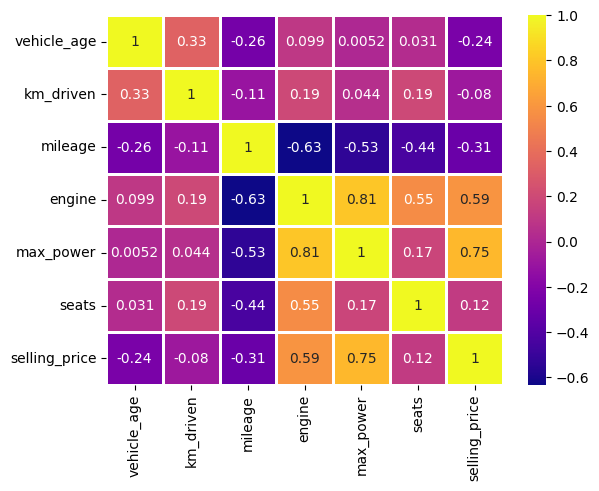

In [11]:
sns.heatmap(data = dataset[numerical_variables].corr() , annot = True, cmap = 'plasma' , linewidth = 2)

Insights

* Engine size, max power, and selling price are strongly correlated.
* Vehicle age negatively impacts selling price – older cars sell for less.
* No strong correlation between fuel type and price – fuel type alone doesn’t determine car value.

### Feature Engineering

 

* Remove unnecessary columns (Unnamed: 0, car_name, brand, model, seller_type).
* Convert categorical values (fuel_type, transmission_type) into numerical format using one-hot encoding (pd.get_dummies()).

In [23]:
model_data = dataset.copy()

model_data.drop(labels = ['Unnamed: 0','car_name','brand','model','seller_type','selling_price'], axis = 1, inplace = True)
model_data

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats
0,9,120000,Petrol,Manual,19.70,796,46.30,5
1,5,20000,Petrol,Manual,18.90,1197,82.00,5
2,11,60000,Petrol,Manual,17.00,1197,80.00,5
3,9,37000,Petrol,Manual,20.92,998,67.10,5
4,6,30000,Diesel,Manual,22.77,1498,98.59,5
...,...,...,...,...,...,...,...,...
15406,9,10723,Petrol,Manual,19.81,1086,68.05,5
15407,2,18000,Petrol,Manual,17.50,1373,91.10,7
15408,6,67000,Diesel,Manual,21.14,1498,103.52,5
15409,5,3800000,Diesel,Manual,16.00,2179,140.00,7


In [ ]:
# convert categorical values into numerical columns by dummies

In [24]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
Y = dataset['selling_price']

x = pd.get_dummies(model_data,dtype = float)
x

,vehicle_age,km_driven,mileage,engine,max_power,seats,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [30]:
# train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,Y,test_size = 0.2)

### Building Model

In [34]:
# Linear regression

from sklearn.linear_model import LinearRegression

regressor = LinearRegression().fit(x_train,y_train)
pred = regressor.predict(x_test)

pred

array([1192362.58707267, -301850.25597431,  164353.84628655, ...,
        717475.66356531,  476738.38838144,  468755.86289213],
      shape=(3083,))